In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import alpaca_trade_api as ata
import datetime as dt
from pytz import timezone
import pytz
import datetime
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time

In [2]:
def download_min_data(
    symbol: str, start: str, end: str
) -> pd.DataFrame:
    """

    Parameters
    ----------
    symbol : asset symbol
    date : YYYY-MM-DD

    Returns
    -------
    df: returns minute data
    """
    def splitTimePeriod(start, end):
        time_periods = []
        curr = start
        while curr < end:
            time_periods.append([curr, curr + datetime.timedelta(days = 7)])
            curr = curr + datetime.timedelta(days = 7)
        time_periods.append([curr - datetime.timedelta(days = 7), end])
        return time_periods
    
    NY = 'America/New_York'
    start_year = int(start[0:4])
    start_month = int(start[5:7])
    start_day = int(start[8:])
    end_year = int(end[0:4])
    end_month = int(end[5:7])
    end_day = int(end[8:])
    
    startDate = dt.datetime(start_year, start_month, start_day)
    endDate = dt.datetime(end_year, end_month, end_day)
    timeRanges = splitTimePeriod(startDate, endDate)
    
    data = []

    for i in timeRanges:
        time1 = pytz.timezone(NY).localize(i[0]).timestamp() * 1000
        time2 = pytz.timezone(NY).localize(i[1]).timestamp() * 1000
        data.append(API.polygon.historic_agg_v2(symbol, 1, 'minute', _from=time1, to=time2).df)
        #time.sleep(20)
    data = pd.concat(data)

    dataFinal = pd.DataFrame()
    for i in range(len(data)):
        timevar = data.index[i].time()
        if timevar >= datetime.time(9, 40) and timevar <= datetime.time(15, 50):
            dataFinal = dataFinal.append(data.iloc[i])

    return dataFinal

In [3]:
# =====================================================
# initialize the API

api_key = "AKKSWEXZVNOJLMG9X7E9"
secret_key = "Pnp7i0Hoc7f2lL1QN85lxUx2j0AAWoxyOfd0q1jV"

API = ata.REST(key_id=api_key, secret_key=secret_key)

# =====================================================
# download some sample tick data

ticker1 = "SPY" #change
ticker2 = "VOO"
start = "2020-05-01" #change 
end = "2020-10-31"
spy = download_min_data(ticker1, start, end)
voo = download_min_data(ticker2, start, end)

In [4]:
print(len(spy))
spy.head(15)

49343


,close,high,low,open,volume,vwap
2020-05-01 09:40:00-04:00,284.6030,284.810,284.600,284.7600,1176284.0,284.7410
2020-05-01 09:41:00-04:00,284.8638,284.920,284.550,284.6069,378318.0,284.7423
2020-05-01 09:42:00-04:00,284.9400,285.010,284.855,284.8700,397935.0,284.9415
2020-05-01 09:43:00-04:00,284.6770,285.020,284.610,284.9300,424480.0,284.7473
2020-05-01 09:44:00-04:00,284.8050,284.920,284.650,284.6650,587137.0,284.7927
2020-05-01 09:45:00-04:00,284.9699,285.000,284.800,284.9000,214909.0,284.9336
2020-05-01 09:46:00-04:00,284.8300,285.020,284.702,284.9700,441571.0,284.8789
2020-05-01 09:47:00-04:00,285.1000,285.140,284.780,284.8200,358231.0,285.0141
2020-05-01 09:48:00-04:00,285.1201,285.150,284.950,285.0900,210278.0,285.0525
2020-05-01 09:49:00-04:00,285.1200,285.130,284.870,285.1100,198474.0,285.0155


In [5]:
spy.tail(15)

,close,high,low,open,volume,vwap
2020-10-30 15:36:00-04:00,323.2700,323.3500,323.223,323.270,160552.0,323.2820
2020-10-30 15:37:00-04:00,323.0600,323.2700,322.950,323.270,405552.0,323.0838
2020-10-30 15:38:00-04:00,323.1800,323.1900,323.010,323.050,265654.0,323.1050
2020-10-30 15:39:00-04:00,323.6700,323.6800,323.150,323.180,397626.0,323.3735
2020-10-30 15:40:00-04:00,323.5400,323.9000,323.460,323.690,213317.0,323.6608
2020-10-30 15:41:00-04:00,323.9200,323.9900,323.510,323.540,603562.0,323.6394
2020-10-30 15:42:00-04:00,324.2100,324.3500,323.870,323.920,549988.0,324.1311
2020-10-30 15:43:00-04:00,324.3901,324.5000,324.030,324.205,291158.0,324.2536
2020-10-30 15:44:00-04:00,324.7100,324.7300,324.390,324.400,294417.0,324.5755
2020-10-30 15:45:00-04:00,324.9200,325.1599,324.680,324.710,725660.0,324.9212


In [6]:
print(len(voo))
voo.head(15)

49271


,close,high,low,open,volume,vwap
2020-05-01 09:40:00-04:00,261.5600,261.7299,261.5600,261.6900,17976.0,261.6533
2020-05-01 09:41:00-04:00,261.7960,261.8280,261.5000,261.5200,19130.0,261.6275
2020-05-01 09:42:00-04:00,261.8300,261.8900,261.8200,261.8460,7563.0,261.8499
2020-05-01 09:43:00-04:00,261.6250,261.8800,261.5400,261.8400,13598.0,261.7085
2020-05-01 09:44:00-04:00,261.7900,261.8200,261.5700,261.5700,17318.0,261.7415
2020-05-01 09:45:00-04:00,261.8609,261.8988,261.6800,261.7900,13758.0,261.8249
2020-05-01 09:46:00-04:00,261.7000,261.9000,261.6300,261.8590,6661.0,261.7996
2020-05-01 09:47:00-04:00,261.9800,262.0100,261.7400,261.7400,49155.0,261.9507
2020-05-01 09:48:00-04:00,262.0000,262.0000,261.9300,261.9500,4953.0,261.9634
2020-05-01 09:49:00-04:00,262.0000,262.0000,261.8450,261.9350,5716.0,261.9392


In [7]:
voo.tail(15)

,close,high,low,open,volume,vwap
2020-10-30 15:36:00-04:00,296.9700,297.024,296.9300,296.9840,10254.0,296.9752
2020-10-30 15:37:00-04:00,296.7500,296.965,296.6800,296.9600,23877.0,296.7745
2020-10-30 15:38:00-04:00,296.8800,296.880,296.7600,296.7600,7893.0,296.8156
2020-10-30 15:39:00-04:00,297.3400,297.360,296.9000,296.9200,15703.0,297.0818
2020-10-30 15:40:00-04:00,297.2000,297.555,297.1700,297.3700,10069.0,297.3546
2020-10-30 15:41:00-04:00,297.5700,297.600,297.2100,297.2300,14768.0,297.3957
2020-10-30 15:42:00-04:00,297.8220,297.950,297.5300,297.6100,17921.0,297.7620
2020-10-30 15:43:00-04:00,298.0100,298.070,297.6602,297.8300,12143.0,297.9007
2020-10-30 15:44:00-04:00,298.2800,298.300,298.0100,298.0100,16506.0,298.1854
2020-10-30 15:45:00-04:00,298.5100,298.670,298.2800,298.3000,23597.0,298.4602


In [8]:
spy = spy.rename(columns={'close': 'spyclose'})
voo = voo.rename(columns={'close': 'vooclose'})
data = spy[['spyclose']].join(voo[['vooclose']], how='outer')
data = data.ffill()
len(data)

50085

In [9]:
vooprice = data['vooclose'].to_numpy()
spyprice = data['spyclose'].to_numpy()
obs_mat = sm.add_constant(np.log(vooprice), prepend=False)[:, np.newaxis]
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)
firstY = np.log(spyprice[0])
firstX = np.log(vooprice[0])
kf = KalmanFilter(n_dim_obs = 1, n_dim_state = 2,
                  initial_state_mean = [firstY / firstX, 0.0],
                  initial_state_covariance = np.ones((2,2)),
                  transition_matrices = np.eye(2), 
                  observation_matrices = obs_mat,
                  observation_covariance = 0.5,
                  transition_covariance= trans_cov)

In [10]:
state_means, state_covs = kf.filter(np.log(spyprice))
slope=state_means[:, 0] 
intercept=state_means[:, 1]

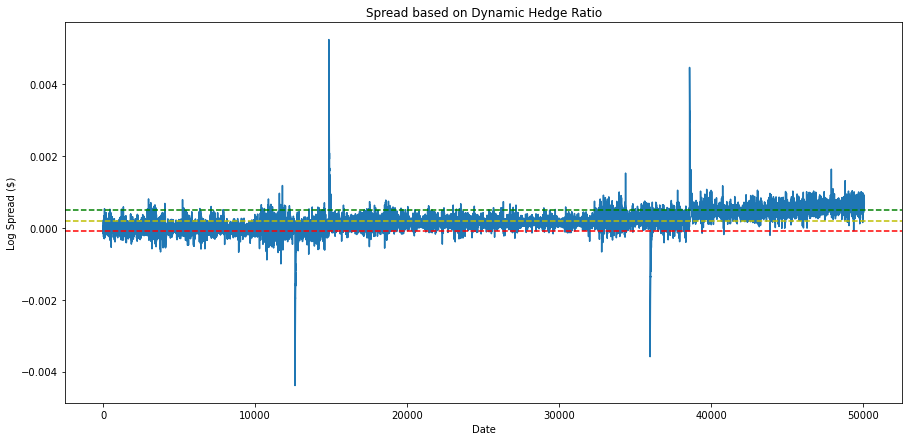

In [11]:
spread_ts = np.log(spyprice) - slope * np.log(vooprice)
plt.figure(figsize = (15,7))
plt.plot(spread_ts)
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")
spread_avg = spread_ts.mean()
spread_sd = spread_ts.std()
upper_threshold = spread_avg + spread_sd
lower_threshold = spread_avg - spread_sd
plt.axhline(upper_threshold, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold, linestyle = 'dashed', color = 'r')

In [12]:
d = {'spread': spread_ts, 'spyprice': data['spyclose'], 'vooprice': data['vooclose']}
spread = pd.DataFrame(index=data.index, data=d)
spread.tail()

,spread,spyprice,vooprice
2020-11-05 15:46:00-05:00,0.000719,349.7199,321.295
2020-11-05 15:47:00-05:00,0.000783,349.7600,321.310
2020-11-05 15:48:00-05:00,0.000844,349.8600,321.380
2020-11-05 15:49:00-05:00,0.000734,350.0100,321.550
2020-11-05 15:50:00-05:00,0.000667,350.3400,321.870
